In [30]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# #1 Missing Migrants Data at US-Mexico Border

In [31]:
df = pd.read_csv("clean_migrants.csv")
df.head()

,year,month_name,month,Web ID,dead_miss
0,2014,Apr,4,471224,12
1,2014,Aug,8,393314,59
2,2014,Feb,2,314087,8
3,2014,Jan,1,470961,12
4,2014,Jul,7,550456,14


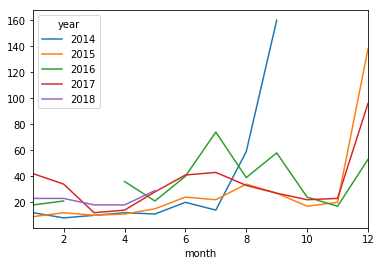

In [32]:
pv = pd.pivot_table(df, index= 'month', columns='year',
                    values='dead_miss', aggfunc='sum')
pv

pv.plot()

# Results
- Most migrant deaths at US-Mexico border at end of year (does this have something to do with getting paid 2 months salary in December?)
- No discernible trend in 2018, around average.  

# #2 Asylum Requests to the US

In [33]:
df = pd.read_csv("soc_038_monthly_asylum_requests.csv")
df.head()
df.value_type.value_counts()

country_of_origin    37940
country_of_asylum     9245
Name: value_type, dtype: int64

In [34]:
# Make a table with only host countries
host = df.loc[(df['value_type'] == 'country_of_asylum') & df['country'].str.contains('USA')]
host.country.value_counts()

USA_EOIR      227
USA_INSDHS    218
Name: country, dtype: int64

In [35]:
host.head()

,the_geom,cartodb_id,_uid,date,country,value_type,num_people,some_stats_confidential
2470,NaN,2471,USA_INSDHS_2017-01-31_country_of_asylum,2017-01-31 00:00:00,USA_INSDHS,country_of_asylum,12417,True
2471,NaN,2472,USA_INSDHS_2017-02-28_country_of_asylum,2017-02-28 00:00:00,USA_INSDHS,country_of_asylum,11608,True
2472,NaN,2473,USA_INSDHS_2017-03-31_country_of_asylum,2017-03-31 00:00:00,USA_INSDHS,country_of_asylum,16331,True
2473,NaN,2474,USA_INSDHS_2017-04-30_country_of_asylum,2017-04-30 00:00:00,USA_INSDHS,country_of_asylum,10485,True
2474,NaN,2475,USA_INSDHS_2017-05-31_country_of_asylum,2017-05-31 00:00:00,USA_INSDHS,country_of_asylum,13287,True


In [36]:
usa = host.groupby('date').sum()
usa.head()
usa.tail()

,the_geom,cartodb_id,num_people,some_stats_confidential
date,,,,
2017-10-31 00:00:00,NaN,4970,10489,1.0
2017-11-30 00:00:00,NaN,46904,11501,1.0
2017-12-31 00:00:00,NaN,46905,10167,1.0
2018-01-31 00:00:00,NaN,46526,12145,0.0
2018-04-30 00:00:00,NaN,94325,6901,1.0


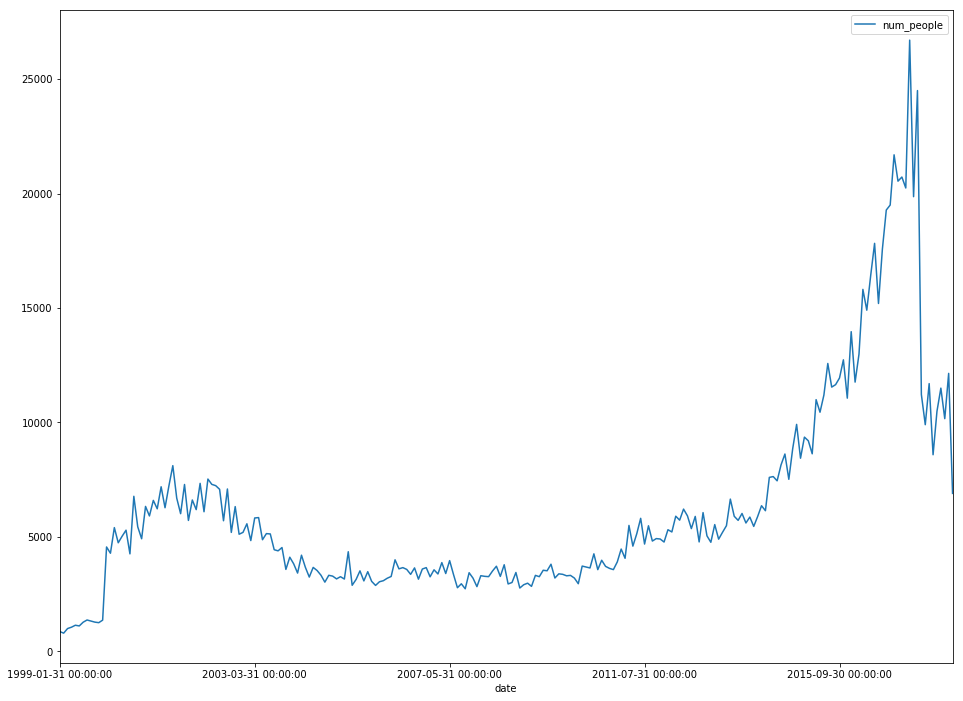

In [37]:
usa.plot(y = 'num_people',  figsize=(16, 12))